In [3]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [42]:
n_data = torch.ones(100, 2)
x0 = torch.normal(2 * n_data, std=1)
x1 = torch.normal(-2 * n_data, std=1)
y0 = torch.zeros(100)
y1 = torch.ones(100)

In [43]:
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)
y = torch.cat((y0, y1), 0).type(torch.LongTensor)

In [44]:
x, y = Variable(x), Variable(y)

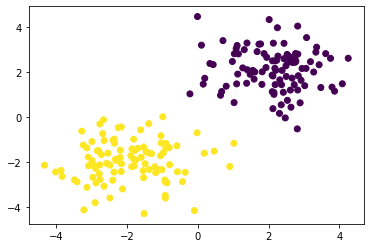

In [45]:
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy())
plt.show()
# c refer to color

In [46]:
import torch.nn.functional as F

In [50]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.out = torch.nn.Linear(n_hidden, n_output)
        
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.out(x)
        return x

    
net = Net(n_feature=2, n_hidden=10, n_output=2)

In [51]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


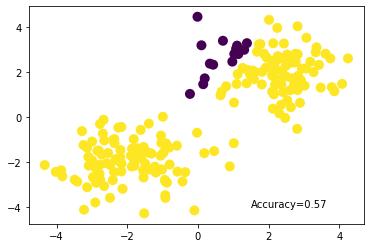

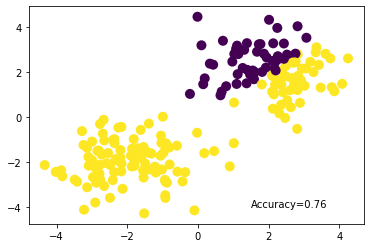

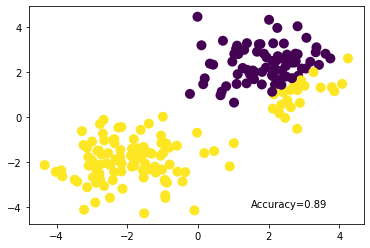

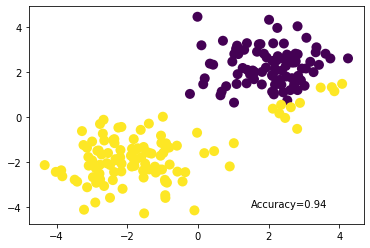

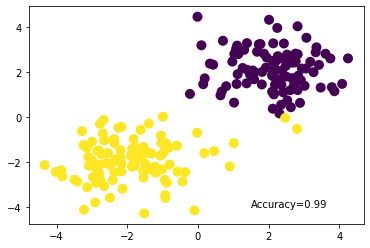

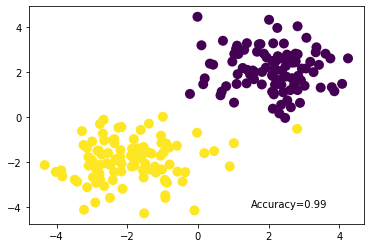

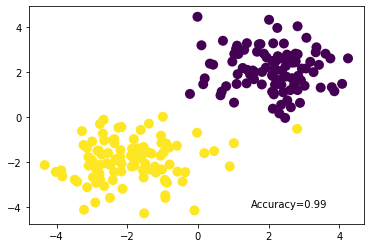

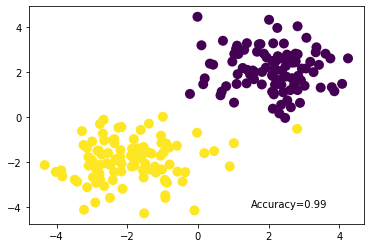

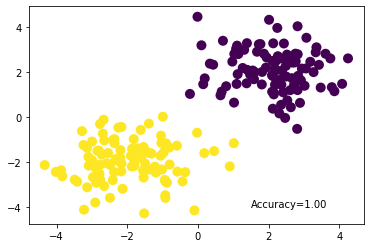

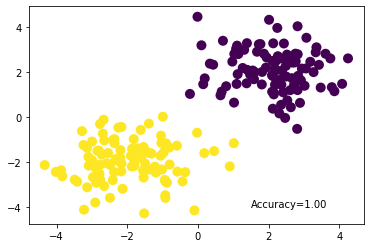

In [52]:
plt.ion()
plt.show()
for t in range(100):
    out = net(x)
    loss = loss_func(out, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if t % 10 ==0:
        plt.cla()
        prediction = torch.max(F.softmax(out), 1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0)
        accuracy = sum(pred_y == target_y)/200  # 预测中有多少和真实值一样
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy)
        plt.pause(0.1)

plt.ioff()  # 停止画图
plt.show()